# Analisando os dados do Airbnb - Madrid

O [Airbnb](https://www.airbnb.com.br/) é considerado a maior empresa hoteleira da atualidade. Ah, o detalhe é que ela não possui nenhum hotel! Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para possibilitar essa hospedagem alternativa. No final de 2018, a Startup fundada há 10 anos já havia hospedado mais de 300 milhões de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do seu site referentes a algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.
<center>
    <img alt="Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Nesta leitura, iremos analisar os dados do Airbnb referentes à cidade de Madrid e descobrir quais informações podemos obter caso quisermos alugar um imóvel para desfrutarmos desta belíssima cidade.
<center>
    <img alt="Plaza Mayor - Madrid" width="50%" src="img/plaza.jpg" />
</center>

Antes de começarmos esta análise, iremos carregar os nossos dados. Todos os dados utilizados foram obtidos a partir do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Começaremos, então, importando a biblioteca Pandas, do Python, e lendo o nosso arquivo.

In [1]:
# importando a biblioteca pandas e lendo o arquivo csv

import pandas as pd

file = 'datasets/listings.csv'
df = pd.read_csv(file)

Utilizaremos a função ‘head()’ para visualizarmos somente as primeiras 5 linhas.

In [2]:
# visualizando as 5 primeiras linhas do arquivo 

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,70,1,75,2020-02-29,0.61,1,90
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,30,4,33,2018-07-15,0.48,2,0
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,15,0,NaN,NaN,7,365
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,68,2020-01-26,0.62,1,1
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,149,2020-03-12,1.22,1,332


Visualizando as 5 primeiras linhas, conseguimos entender quais são os tipos de informações que estão em nosso arquivo. Porém, para obtermos um melhor entendimento, vamos visualizar o dicionário de dados com a descrição de cada coluna:
* id - Número de identificação gerado para o imóvel
* name - Nome da propriedade anunciada
* host_id - Número de identificação do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - Nome do grupo de bairro (região)
* neighbourhood - Nome do bairro
* latitude - Coordenada da latitude da propriedade
* longitude - Coordenada da longitude da propriedade
* room_type - Tipo de acomodação que é oferecida
* price - Preço para alugar o imóvel
* minimum_nights - Quantidade mínima de noites para reservar
* number_of_reviews - Número de reviews que a propriedade possui
* last_review - Data do último review
* reviews_per_month - Quantidade de reviews por mês
* calculated_host_listings_count - Quantidade de imóveis do mesmo anfitrião
* availability_365 - Número de dias de disponibilidade dentro de 365 dias

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de dados de cada coluna.

In [3]:
# imprimindo o número de linhas e colunas do nosso conjunto de dados
# visualizando os tipos de dados de cada coluna

print(f"Linhas: {df.shape[0]}")
print(f"Colunas: {df.shape[1]}")

df.dtypes

Linhas: 21739
Colunas: 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

A qualidade de um conjunto de dados está diretamente relacionada à quantidade de valores ausentes. É importante entendermos logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [4]:
# visualizando a quantidade (porcentagem) de valores ausentes por coluna

((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending = False)

reviews_per_month                 23.29914
last_review                       23.29914
host_name                          0.01380
name                               0.01380
availability_365                   0.00000
calculated_host_listings_count     0.00000
number_of_reviews                  0.00000
minimum_nights                     0.00000
price                              0.00000
room_type                          0.00000
longitude                          0.00000
latitude                           0.00000
neighbourhood                      0.00000
neighbourhood_group                0.00000
host_id                            0.00000
id                                 0.00000
dtype: float64

Podemos ver que as colunas *reviews_per_month* e *last_review* possuem mais de 23% dos seus valores ausentes. Uma das formas de contornarmos a ausência destes dados, por exemplo, na coluna *reviews_per_month*, é preenchendo as linhas onde estes dados estão ausentes com a média, ou a mediana, de todas as linhas em que este dado está presente; porém cada caso tem que ser analisado separadamente para sabermos se é melhor preenchê-las ou removê-las. Vamos usar a função ‘describe()’ para obtermos um resumo estatístico de nossos dados numéricos.

In [5]:
# obtendo o resumo estatístico dos dados numéricos

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,21739.000000,21739.000000,21739.000000,16674.000000,21739.000000,21739.000000
mean,165.105387,5.312894,36.998298,1.630527,14.638070,170.737338
std,554.708399,25.299401,66.826552,1.733532,39.763124,141.622838
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,39.000000,1.000000,1.000000,0.340000,1.000000,5.000000
50%,64.000000,2.000000,8.000000,1.000000,2.000000,166.000000
75%,100.000000,3.000000,42.000000,2.420000,7.000000,335.000000
max,9999.000000,1125.000000,661.000000,32.840000,239.000000,365.000000


Olhando o resumo estatístico acima, notamos que:
* A média de preço (*price*) para alugar um imóvel é 165;
* A mediana de preço é 64;
* O valor máximo de preço é 9999;
* O valor mínimo de preço é 0;
* O desvio-padrão de preço é em torno de 554;
* A média do mínimo de noites (*minimum_nights*) é 5;
* A mediana do número de noites é 2;
* O valor máximo do mínimo de noites é 1125;
* O valor mínimo do número de noites é 1;
* O desvio-padrão do mínimo de noites é de 25.

Para entendermos melhor como nossos dados estão distribuídos, vamos utilizar histogramas para as colunas *price* e *minimum_nights*.

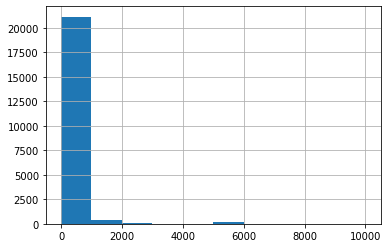

In [6]:
# visualizando um histograma com os dados da coluna price

df.price.hist();

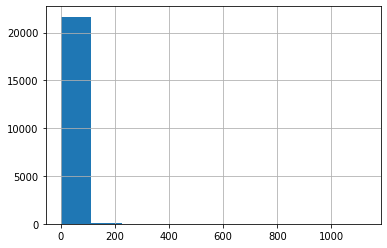

In [7]:
# visualizando um histograma com os dados da coluna minimum_nights

df.minimum_nights.hist();

Após o resumo estatístico e a visualização dos histogramas, temos como afirmar que possuímos valores que destoam dos demais e que também interferem na nossa representação gráfica. Utilizando gráficos no formato de caixa (*boxplot*), podemos ver melhor os valores mais discrepantes, que chamamos de *outliers*.

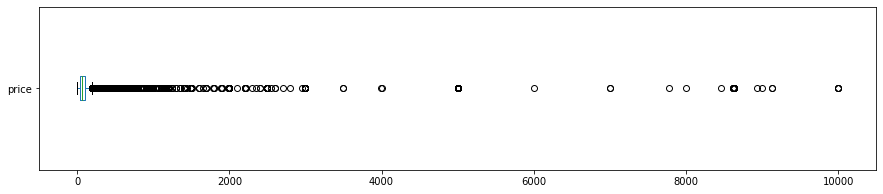

In [8]:
# visualizando um boxplot com os dados da coluna price

df.price.plot(kind='box', vert=False, figsize=(15, 3),);

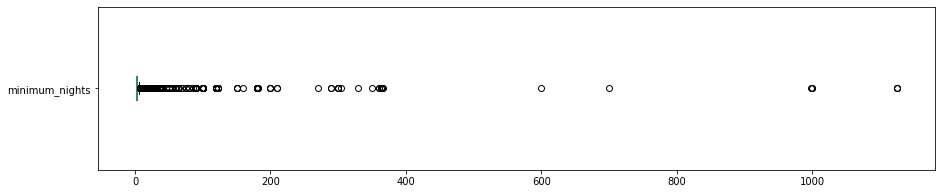

In [9]:
# visualizando um boxplot com os dados da coluna minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),);

**Regra 1.5xIQR (Interquartile Range)**

Os estatísticos desenvolveram diversas maneiras de identificar o que pode e o que não pode ser considerado um outlier. Uma regra bastante usada afirma que um dado é um outlier quando ele é maior que 1.5 x IQR acima do terceiro quartil (Q3) ou abaixo do primeiro quartil (Q1). O IQR é a diferença entre o terceiro e o primeiro quartil. Segundo o cálculo, preços superiores a 191.5 podem ser considerados *outliers*.

In [10]:
# aplicando a regra do 1.5xIQR

Q1 = df['price'].quantile(q = 0.25)
Q3 = df['price'].quantile(q = 0.75)
IQR = Q3 - Q1

lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

print(lower)
print(upper)

-52.5
191.5


Podemos ver que temos 255 imóveis que exigem um mínimo de mais de 30 noites e 2518 que custam mais de 191.5 *euros* a diária.

In [11]:
# imprimindo a quantidade de registros do conjunto de dados, a de registros com o mínimo de noites superior a 30 e a de registros com o preço superior a 191.5

print(f"Quantidade de registros no conjunto de dados: {df.shape[0]} entradas")
print(f"Mínimo de noites superior a 30: {len(df[df.minimum_nights > 30])} entradas")
print(f"Preço superior a 191.5: {len(df[df.price > 191.5])} entradas")

Quantidade de registros no conjunto de dados: 21739 entradas
Mínimo de noites superior a 30: 255 entradas
Preço superior a 191.5: 2518 entradas


Para melhorarmos nossa análise, decidimos por remover as linhas que possuem registros da coluna *minimum_nights* superiores a 30 (1 mês) e da coluna *price* superiores a 191.5 (baseado na regra 1.5xIQR). Desta forma, iremos analisar os imóveis que custam até 191.5 *euros* para alugar e os que não exigem um mínimo de mais de 30 noites para a realização da hospedagem. Antes de remover, criaremos uma cópia dos nossos dados para podermos continuar a análise, sem interferirmos nos dados originais. Se decidirmos, por exemplo, que faremos uma nova análise com um número diferente de *minimum_nights* e de *price*, podemos criar uma nova cópia dos nossos dados originais, que não tiveram valores alterados ou removidos.

In [12]:
# criando uma cópia dos dados originais e removendo os dados que decidimos eliminar

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 191.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

Agora vamos falar sobre os tipos de imóveis mais alugados em Madrid pelo Airbnb. A coluna *room_type* indica o tipo de acomodação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos e casas inteiras, apenas o aluguel de um quarto ou até mesmo dividir o quarto com outras pessoas. Vamos contar a quantidade de ocorrências de cada tipo de acomodação usando a função ‘value_counts()’.

In [13]:
# visualizando a quantidade de todos os tipos de acomodações oferecidas

df_clean.room_type.value_counts()

Entire home/apt    11531
Private room        7004
Shared room          286
Hotel room           157
Name: room_type, dtype: int64

Para visualizarmos melhor, podemos também ver as mesmas informações no formato de porcentagem.

In [14]:
# visualizando a quantidade (porcentagem) de todos os tipos de acomodações oferecidas

df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    60.759827
Private room       36.905891
Shared room         1.507008
Hotel room          0.827274
Name: room_type, dtype: float64

De acordo com esses dados, podemos dizer que 60% das ocorrências são apartamentos ou casas inteiras, 36% são quartos privados, um pouco mais de 1% é de quartos compartilhados e menos de 1% é de quartos de hotéis.

**Qual a média de preço do Airbnb em Madrid?**

Digamos que você esteja indo a Madrid e gostaria de saber qual a média de preço para a locação de uma casa, de um apartamento ou até mesmo de apenas um quarto. Começaremos vendo a quantidade de registros por região de Madrid.

In [15]:
# visualizando a quantidade de acomodações por região

print(df_clean['neighbourhood_group'].value_counts())

Centro                   8748
Salamanca                1233
Chamberí                 1175
Arganzuela               1104
Tetuán                    801
Carabanchel               647
Puente de Vallecas        637
Retiro                    623
Latina                    614
Ciudad Lineal             605
Moncloa - Aravaca         547
Chamartín                 488
San Blas - Canillejas     335
Hortaleza                 319
Usera                     278
Fuencarral - El Pardo     269
Villaverde                161
Barajas                   152
Moratalaz                 112
Villa de Vallecas          84
Vicálvaro                  46
Name: neighbourhood_group, dtype: int64


Vimos que a região Centro é a que mais possui imóveis disponíveis para locação no site do Airbnb. Agora vamos ver a média de preço por região. A função ‘group_by()’ nos permite agrupar todos os preços por região e a função ‘mean()’, calcular a média de preço de cada um destes grupos. Por final, utilizamos a função ‘sort_values()’ para ordenarmos nossos dados agrupados da maior média de preço para a menor.

In [16]:
# visualizando a média de preço por região

df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)

neighbourhood_group
Salamanca                76.246553
Centro                   72.488455
Moncloa - Aravaca        68.464351
Chamartín                68.389344
Retiro                   66.468700
Chamberí                 64.073191
Tetuán                   61.162297
Hortaleza                60.680251
Arganzuela               57.798007
Fuencarral - El Pardo    53.486989
Barajas                  53.407895
San Blas - Canillejas    52.958209
Ciudad Lineal            48.046281
Carabanchel              47.185471
Vicálvaro                46.673913
Villa de Vallecas        46.095238
Moratalaz                44.821429
Latina                   44.819218
Usera                    43.230216
Puente de Vallecas       39.673469
Villaverde               34.018634
Name: price, dtype: float64

Visualizamos que as regiões de Salamanca e Centro possuem uma média de preço acima de 70 *euros*. Uma pessoa que não conhece Madrid pode aceitar esses resultados sem se questionar, mas, como vimos anteriormente, há regiões com muitos registros e outras com uma quantidade que pode não ser representativa quando queremos ver a média de todos os preços por região. Agora, vamos ver a média de preço para a locação de um quarto privado que custe a partir de 50 *euros* mas que não ultrapasse 120.

In [17]:
# visualizando a média de preço por região de um quarto privado e que custe a partir de 50 euros mas que não ultrapasse 120

df_clean.loc[(((df_clean['price'] >= 50)\
               & (df_clean['price'] <= 120))\
               & (df_clean['room_type'] == 'Private room'))] \
               .groupby(['neighbourhood_group'])\
               .price.mean()\
               .sort_values(ascending=False)

neighbourhood_group
Latina                   75.971429
Carabanchel              75.783784
Barajas                  73.933333
Hortaleza                72.447368
San Blas - Canillejas    71.584906
Villa de Vallecas        71.428571
Vicálvaro                70.250000
Retiro                   68.384615
Moncloa - Aravaca        68.350000
Centro                   67.862963
Villaverde               67.750000
Arganzuela               67.686747
Usera                    67.500000
Moratalaz                66.428571
Salamanca                66.284404
Chamartín                65.657895
Chamberí                 65.449438
Puente de Vallecas       64.033333
Fuencarral - El Pardo    63.709677
Ciudad Lineal            63.486486
Tetuán                   61.493333
Name: price, dtype: float64

Vamos também ver a média de preço para a locação de um apartamento ou de uma casa inteira que custe a partir de 100 *euros* mas que não ultrapasse 200.

In [18]:
# visualizando a média de preço por região, de um apartamento ou de uma casa inteira e que custe a partir de 100 euros mas que não ultrapasse 200

df_clean.loc[(((df_clean['price'] >= 100)\
               & (df_clean['price'] <= 200))\
               & (df_clean['room_type'] == 'Entire home/apt'))] \
               .groupby(['neighbourhood_group'])\
               .price.mean()\
               .sort_values(ascending=False)

neighbourhood_group
Vicálvaro                151.250000
Moncloa - Aravaca        137.475410
Usera                    135.357143
Salamanca                132.481605
Tetuán                   131.155340
Barajas                  130.500000
Chamberí                 130.090909
San Blas - Canillejas    130.071429
Hortaleza                128.861111
Fuencarral - El Pardo    128.714286
Centro                   128.674164
Chamartín                128.139241
Puente de Vallecas       126.909091
Ciudad Lineal            125.022222
Retiro                   124.991379
Moratalaz                124.200000
Arganzuela               123.192661
Carabanchel              122.769231
Latina                   119.466667
Villa de Vallecas        115.400000
Villaverde               112.500000
Name: price, dtype: float64

E se quisermos visualizar os imóveis do tipo casa ou apartamento inteiro na região de San Blas-Canillejas?

In [19]:
# visualizando imóveis do tipo casa ou apartamento inteiro na região de San Blas-Canillejas

df_clean.loc[((df_clean['room_type'] == 'Entire home/apt') & (df_clean['neighbourhood_group'] == 'San Blas - Canillejas'))].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
354,797030,Cosy flat with terrace near subway,4198169,Willem,San Blas - Canillejas,Simancas,40.43638,-3.63344,Entire home/apt,45,4,228,2020-04-20,2.52,1,325
622,1485339,Apartamento Cerca del estadio WANDA METROPOLITANO,7943769,Javier,San Blas - Canillejas,Arcos,40.41841,-3.61466,Entire home/apt,60,3,19,2019-09-29,0.53,1,0
645,1595592,Aeropuerto-IFEMA-CC.Plenilunio,8508444,Ana,San Blas - Canillejas,Rejas,40.44360,-3.58781,Entire home/apt,70,5,0,NaN,NaN,1,76
679,1683393,SPECTACULAR LOFT OF THREE FLOORS,8901422,Valentina,San Blas - Canillejas,Simancas,40.43995,-3.61762,Entire home/apt,85,1,289,2020-03-12,3.68,2,174
817,2228090,Loft de diseño Madrid lujo terraza,1718458,Juan,San Blas - Canillejas,Simancas,40.43978,-3.61874,Entire home/apt,100,30,0,NaN,NaN,30,365


Podemos realizar diversas pesquisas em nossos dados para obtermos informações como estas que foram mostradas. Nosso conjunto de dados fornece as latitudes e longitudes de cada imóvel. Vamos finalizar com um mapa construído utilizando a latitude e a longitude de cada imóvel e seu preço.

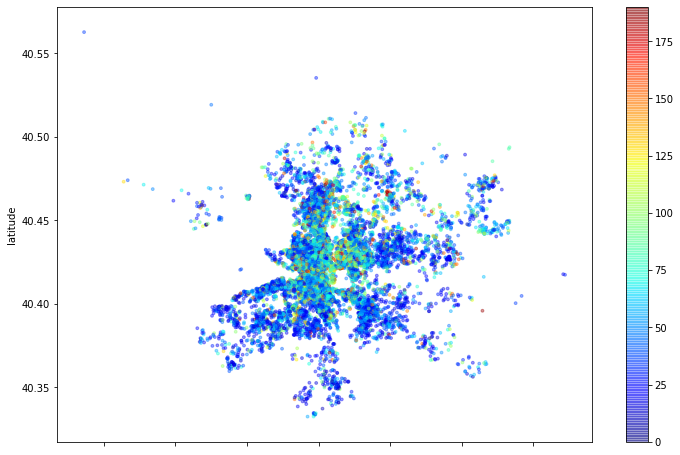

In [20]:
# importando a biblioteca matplotlib
# plotando um mapa utilizando a latitude e a longitude de cada imóvel e seu preço

import matplotlib.pyplot as plt

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, \
              c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusão

Fizemos apenas uma análise superficial utilizando dados que se encontram na base de dados do Airbnb. Notamos que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas. Por fim, ressaltamos que este conjunto de dados é uma versão resumida, ideal apenas para uma análise inicial. Recomendamos que seja usado, em uma próxima análise, o conjunto completo de dados que se encontra também no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

In [21]:
# exportando os dados alterados para um novo CSV

df_clean.to_csv('datasets/new_listings.csv', index = False)